# Importing the dataset

### Imports

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Code

#### Creating the df

In [40]:
df = pd.read_csv("../Datasets/dataset.csv")

df.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

#### Letting just the numbers

In [41]:
["FileName", "md5Hash"]

df.drop(columns=["FileName", "md5Hash"], inplace=True)
df.head()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


#### Extracting just the relevant features

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Machine             62485 non-null  int64
 1   DebugSize           62485 non-null  int64
 2   DebugRVA            62485 non-null  int64
 3   MajorImageVersion   62485 non-null  int64
 4   MajorOSVersion      62485 non-null  int64
 5   ExportRVA           62485 non-null  int64
 6   ExportSize          62485 non-null  int64
 7   IatVRA              62485 non-null  int64
 8   MajorLinkerVersion  62485 non-null  int64
 9   MinorLinkerVersion  62485 non-null  int64
 10  NumberOfSections    62485 non-null  int64
 11  SizeOfStackReserve  62485 non-null  int64
 12  DllCharacteristics  62485 non-null  int64
 13  ResourceSize        62485 non-null  int64
 14  BitcoinAddresses    62485 non-null  int64
 15  Benign              62485 non-null  int64
dtypes: int64(16)
memory usage: 7.6 MB


In [47]:
corr = df.corr()


<Axes: >

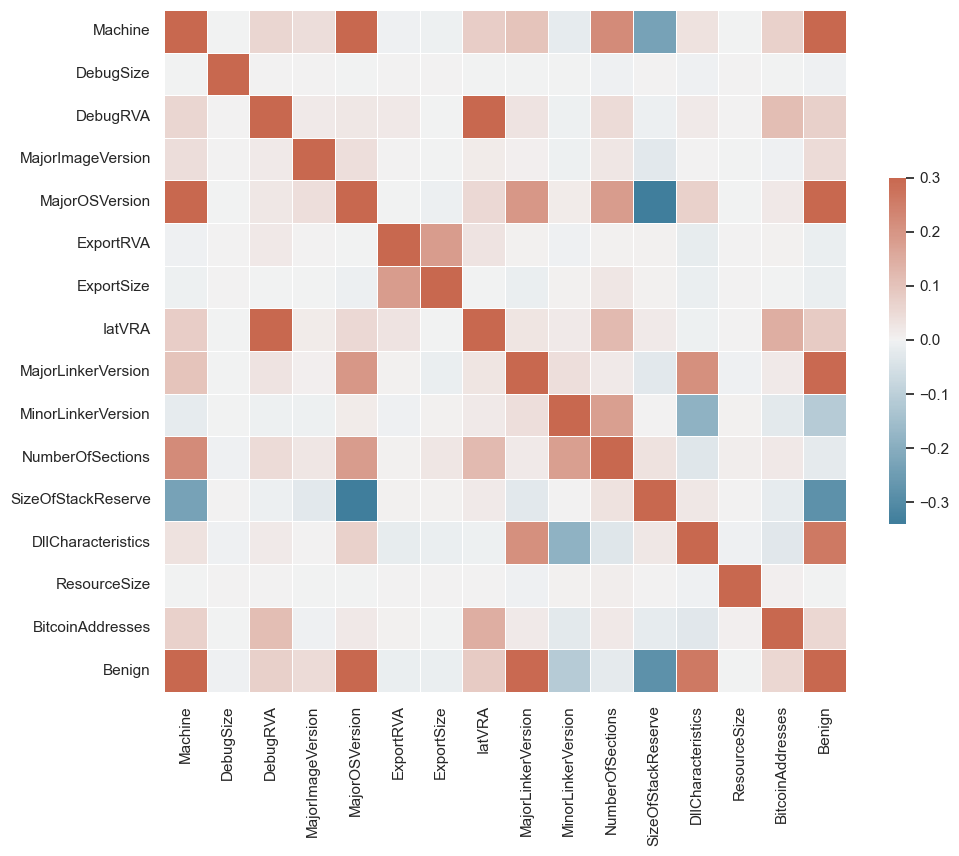

In [50]:
sns.set_theme(style="white")

# Set up the matplotlib figure

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
positive_corrs = df.corr().Benign[df.corr().Benign > 0.2].index.tolist()
neagative_corrs = df.corr().Benign[df.corr().Benign < -0.2].index.tolist()
all_corrs = positive_corrs + neagative_corrs
all_corrs

['Machine',
 'MajorOSVersion',
 'MajorLinkerVersion',
 'DllCharacteristics',
 'Benign',
 'SizeOfStackReserve']

In [33]:
df.drop(columns=all_corrs, inplace=True)
df.head()

,DebugSize,DebugRVA,MajorImageVersion,ExportRVA,ExportSize,IatVRA,MinorLinkerVersion,NumberOfSections,ResourceSize,BitcoinAddresses
0,0,0,0,0,0,8192,0,3,672,0
1,84,121728,10,126576,4930,0,10,8,1024,0
2,0,0,0,0,0,8192,0,3,672,0
3,84,19904,10,21312,252,18160,10,6,1040,0
4,84,97728,10,105792,1852,70592,10,7,1096,0
